In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 子图

### Subplots 绘制均匀状态下的子图

#### Subplots

`plt.subplots` 返回的元素是由画布和子图构成的列表, 所以我们经常使用 `figure, ax = plt.subplots()` 的方式进行画布和子图的初始化.

- Subplots 的参数
	- 行
	- 列
	- figsize: 画布的大小
	- sharex, sharey: 是否共享 x 和 y 轴的刻度.
	- tight_layout: 可以调整子图的相对大小来避免字符的重叠

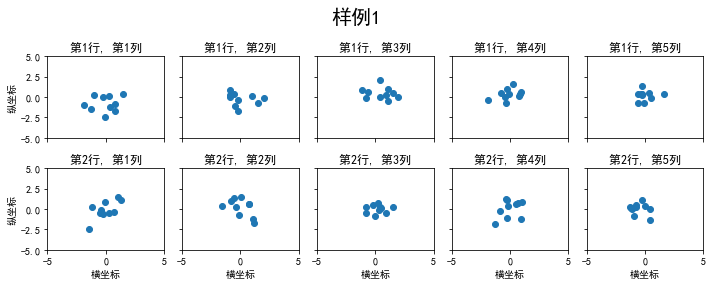

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(10,4), sharex=True, sharey=True)
fig.suptitle("样例1", size = 20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title("第%d行, 第%d列"%(i+1, j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

#### Subplot

除了使用这种方式, 还可以基于 OO 模式进行子图的编辑

- 先设定 figure
- 然后使用 `plt.subplot()` 函数来设置子图的总宽高以及编辑的子图是哪个.

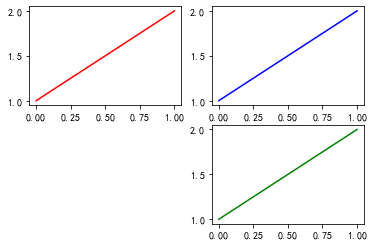

In [5]:
plt.figure()

plt.subplot(2,2,1) # 2*2的子图中的第一个
plt.plot([1,2],'r')

plt.subplot(2,2,2)
plt.plot([1,2], 'b')

plt.subplot(224)  # 当三位数都小于10时，可以省略中间的逗号，这行命令等价于plt.subplot(2,2,4) 
plt.plot([1,2], 'g');

#### Projection

在希望建立极坐标系下的图表时, 可以使用 projection 方法.

玫瑰图的绘制

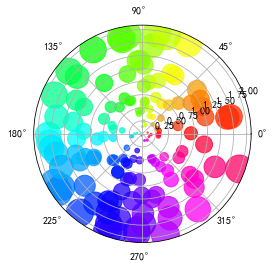

In [6]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75);

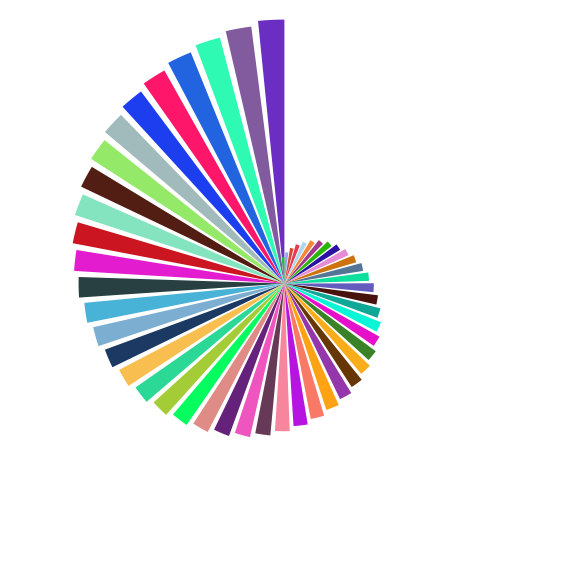

In [7]:
# 玫瑰图的绘制
N = 50
theta = np.linspace(0.5*np.pi, 2.5*np.pi, N)
r = np.linspace(1000, 100, N)
title = np.arange(0,N)
colors = np.random.rand(N*3)
colors = colors.reshape(N,3)  # 生成N个随机的三原色元组

plt.figure( figsize=(8,8))
plt.subplot(projection='polar')
plt.bar(theta, r, align="edge", width = 0.1, color=colors, label = title)
plt.axis('off')
plt.tight_layout()

### 使用 GridSpec 绘制非均匀子图

在我们不希望子图的所有比例大小完全相同时, 利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`.

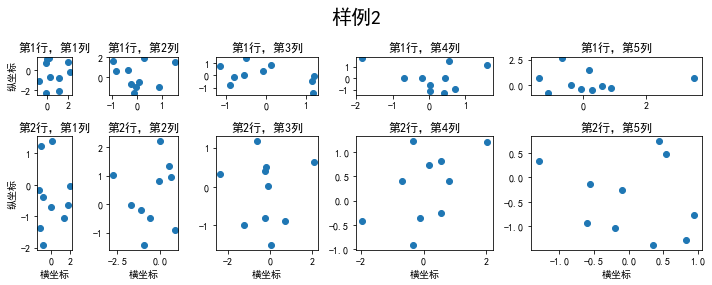

In [8]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

### 子图上的方法

- 常用直线的画法为:  `axhline, axvline, axline`

- 使用 `grid` 添加网格

- 使用 `set_xscale` 可以设置坐标轴的规度 (如指数坐标)

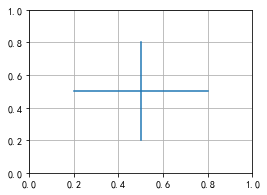

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
# ax.axline([0.3,0.3],[0.7,0.7]);

ax.grid(True)

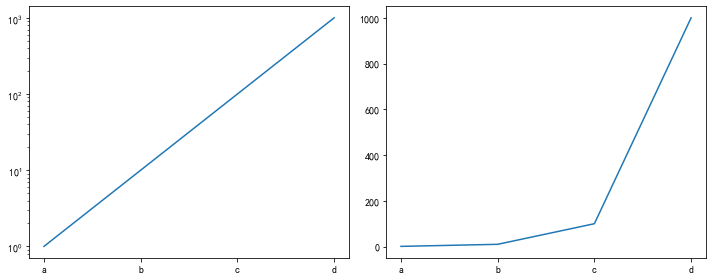

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
    else:
        pass
fig.tight_layout()

### 思考题

- 墨尔本1981年至1990年的每月温度情况

	数据集来自github仓库下data/layout_ex1.csv  
	请利用数据，画出如下的图:
	
	![](https://s1.vika.cn/space/2022/07/19/85ae5acf88f546929446fa6507ae1141)

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图
	
	![](https://s1.vika.cn/space/2022/07/19/70b4b3677c704cc49ef082e9fc640d08)

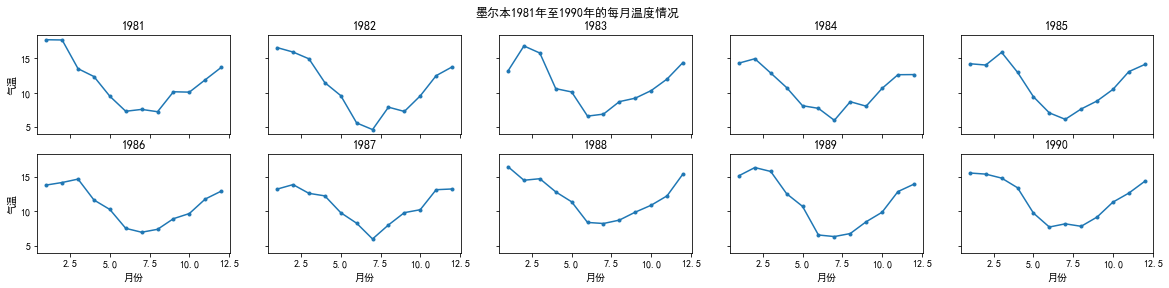

In [35]:
# 墨尔本天气
data = pd.read_csv('layout_ex1.csv')
year0 = 1981
fig, axs = plt.subplots(2, 5, figsize=(20,4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年至1990年的每月温度情况')
for year in range(10):
    i, j = year//5, year%5
    tmp = data[year*12 : (year+1)*12]
    axs[year//5, year%5].plot(np.arange(1,13), tmp['Temperature'].tolist(), marker='.')
    axs[year//5, year%5].set_title('%d'%(year+year0))
    if year//5==1: axs[i][j].set_xlabel('月份')
    if year%5==0: axs[i][j].set_ylabel('气温')

In [ ]:
# 思考题2

data_2 = np.random.randn(2,150)
fig = plt.figure(figsize=[8,6])
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[8,2], height_ratios=[2,8])
for i in range(2):
    for j in range(2):
        if i == 0 and j == 1: continue
        ax = fig.add_subplot(spec[i][j])
        if i == 1 and j == 0:
            ax.scatter(data_2)
        elif i == 0 and j == 1:
            cnt_x = 0
            for n, m in data_2:
                
            ax.bar(data_2[0])
            